<a href="https://colab.research.google.com/github/tstef87/IDS/blob/main/HW4/problem1_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(readr)

#reading in data
adult_training <- read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW4/adult_training.csv")

Rows: 14797 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): workclass, marital-status, occupation, sex, income
dbl (4): age, education, capital-gain, capital-loss

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [2]:
summary(adult_training)

      age         workclass           education     marital-status    
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capital-gain    capital-loss    
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

***Contingency Table:***
In this section I created two concengency tables. the first Workclass vs. Sex. the second sex vs. marital status. I then ploted both tables but had issues getting the correct plot that I wanted. 

In [3]:
# 2-Way Cross Tabulation
install.packages("gmodels")
library(gmodels)

#working class vs. sex
CrossTable(adult_training$workclass, adult_training$sex)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’





 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  14797 

 
                         | adult_training$sex 
adult_training$workclass |    Female |      Male | Row Total | 
-------------------------|-----------|-----------|-----------|
                       ? |       377 |       452 |       829 | 
                         |    37.662 |    18.715 |           | 
                         |     0.455 |     0.545 |     0.056 | 
                         |     0.077 |     0.046 |           | 
                         |     0.025 |     0.031 |           | 
-------------------------|-----------|-----------|-----------|
             Federal-gov |       149 |       305 |       454 | 
                         |     0.019 |     0.010 |           | 
                         |     0.328 |     0.672 |     0

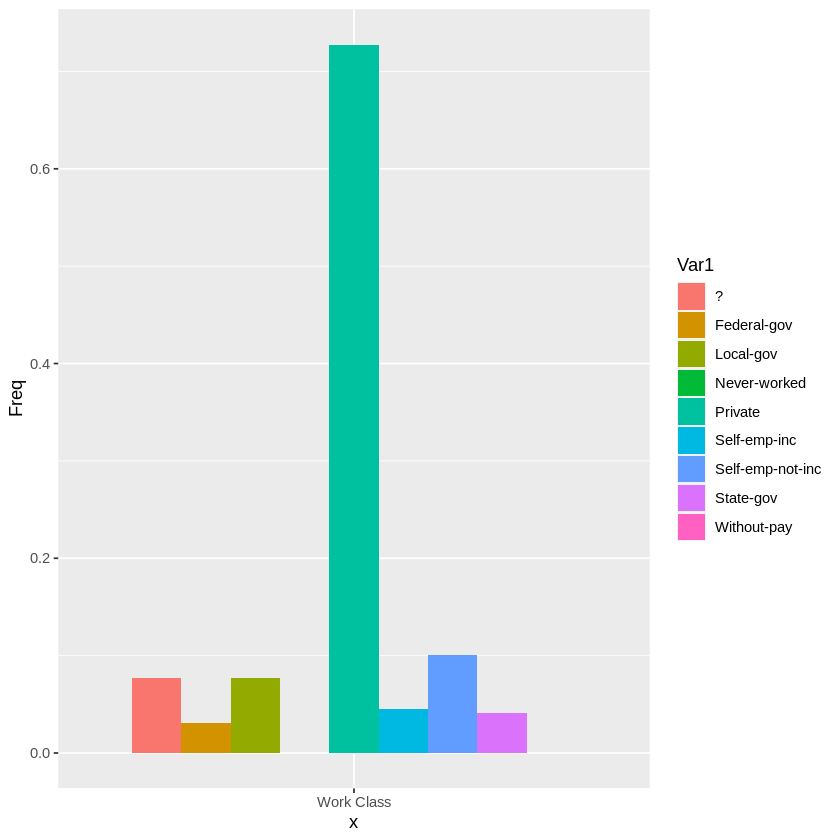

In [48]:
library("ggplot2")

#table work class vs. sex 
P <- prop.table(table(adult_training$workclass, adult_training$sex), margin = 2)

ggplot(as.data.frame(P), aes(x = 'Work Class', y= Freq, fill = Var1)) +
geom_bar(stat="identity", position = "dodge")
#had trouble getting the same chart as i did in python

In [4]:
#creating contingency table for sex vs. marital status
CrossTable(adult_training$sex, adult_training$`marital-status`)



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  14797 

 
                   | adult_training$`marital-status` 
adult_training$sex |              Divorced |     Married-AF-spouse |    Married-civ-spouse | Married-spouse-absent |         Never-married |             Separated |               Widowed |             Row Total | 
-------------------|-----------------------|-----------------------|-----------------------|-----------------------|-----------------------|-----------------------|-----------------------|-----------------------|
            Female |                  1219 |                     7 |                   761 |                    95 |                  2160 |                   290 |                   380 |                  4912 | 
                   |               453.176 |  

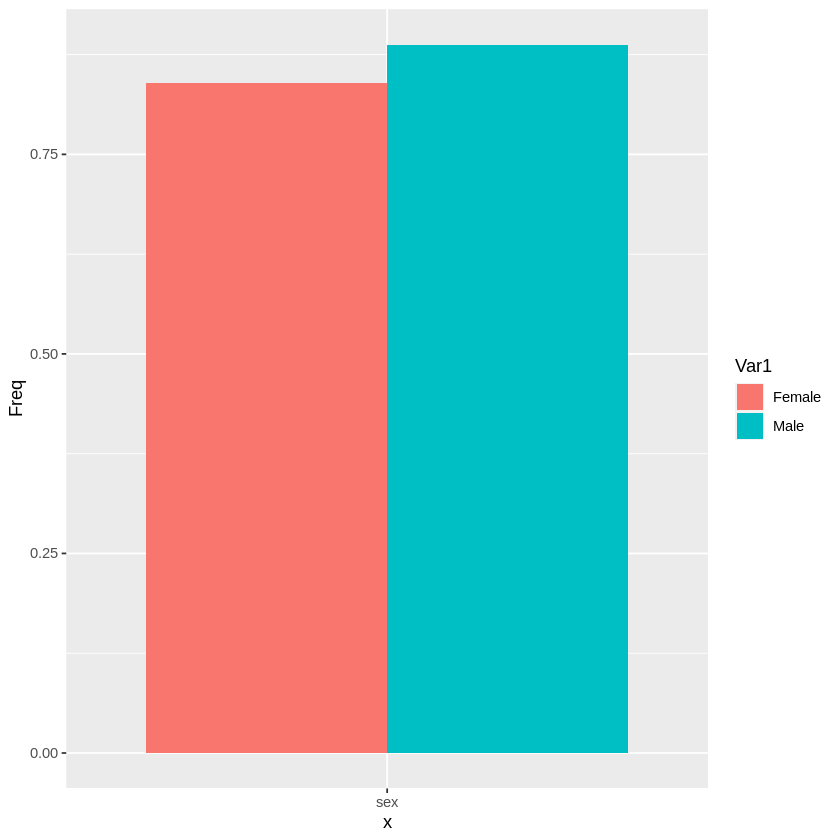

In [52]:
#table sex vs. martial status 
P <- prop.table(table(adult_training$sex, adult_training$`marital-status`), margin = 2)

ggplot(as.data.frame(P), aes(x = 'sex', y= Freq, fill = Var1)) +
geom_bar(stat="identity", position = "dodge")
#had toruble getting the same chart as i did in python 

***Adult Over 40:***
To make the new dataframe i tool the old data frame and only accepted the data where age was grater than 40. i then constructed another cross table of sex and marital-status. Like the probles before i had trouble getting the correct graph. 

In [53]:
#making data frame for people over 40 
over40 <- data.frame(adult_training[adult_training$age >40, ] )

#making the cross table for people over 40
CrossTable(over40$sex, over40$marital.status)


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  6144 

 
             | over40$marital.status 
  over40$sex |              Divorced |    Married-civ-spouse | Married-spouse-absent |         Never-married |             Separated |               Widowed |             Row Total | 
-------------|-----------------------|-----------------------|-----------------------|-----------------------|-----------------------|-----------------------|-----------------------|
      Female |                   720 |                   305 |                    38 |                   256 |                   133 |                   354 |                  1806 | 
             |               413.254 |               559.881 |                 6.779 |                46.303 |                85.561 |               420.

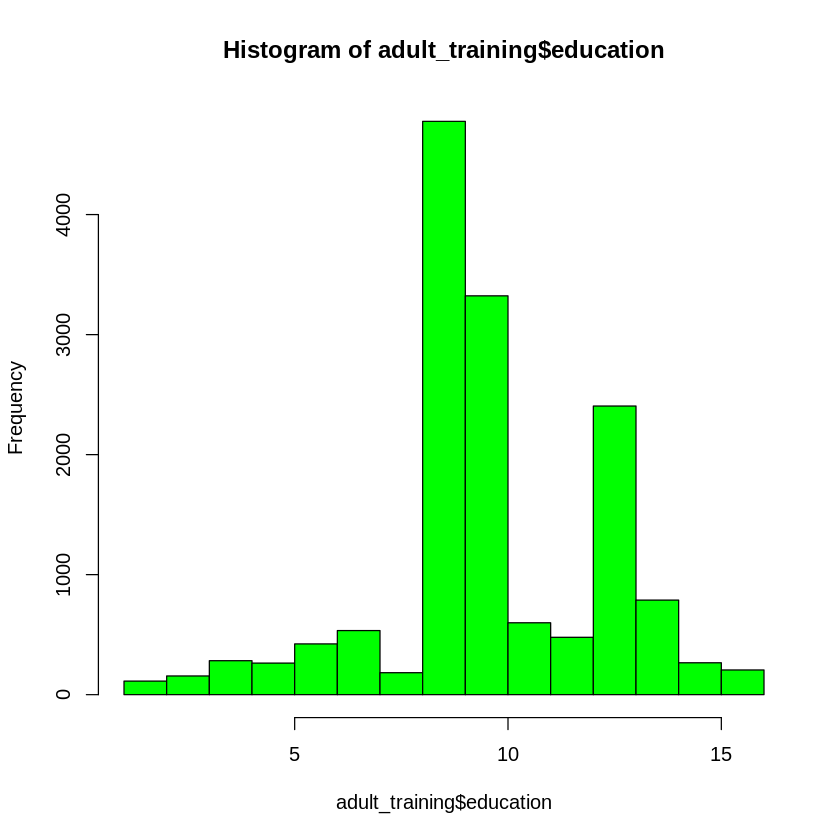

In [54]:
#creating histogram to see outliers 
hist(adult_training$education, col="green")


***Outliers in Education:***
To find the outliers I first calculated some basic data(mean, var, and std). I then created a new value called scaled_education. After making that I was able to apply the three sigma rule and it told me the number of outliers. In all there are 113 outliers. 

In [55]:
#computing basic stats for education 
educationDF <- data.frame (
  mean = mean(adult_training$education),
  var = var(adult_training$education),
  std = sd(adult_training$education)
)

educationDF

mean,var,std
<dbl>,<dbl>,<dbl>
10.0688,6.751147,2.598297


In [56]:
#making scaled education 
adult_training$scaled_education <- scale(x = adult_training$education)

summary(adult_training$scaled_education)


       V1          
 Min.   :-3.49029  
 1st Qu.:-0.41135  
 Median :-0.02648  
 Mean   : 0.00000  
 3rd Qu.: 0.74326  
 Max.   : 2.28273  

In [57]:
#three sigma rule 
three_sigma_rule <- (adult_training$scaled_education < -3 | adult_training$scaled_education > 3)

#number of outliers
cat ("There are", sum(three_sigma_rule), "outliers \n\n")

There are 113 outliers 



***Standardizing Age:***
Next I moved on to age. I took the same approach as I did in the previous cells. I created scaled_age and with that i applyed the three sigma rule and it told me that there were 60 outliers. 90 (3.751227) being the highest

In [59]:
#Standardizing age

#making sacled age
adult_training$scaled_age <- scale(x = adult_training$age)

summary(adult_training$scaled_age)

       V1         
 Min.   :-1.5855  
 1st Qu.:-0.7813  
 Median :-0.1234  
 Mean   : 0.0000  
 3rd Qu.: 0.6808  
 Max.   : 3.7512  

In [60]:
#three sigma rule 
three_sigma_rule <- (adult_training$scaled_age < -3 | adult_training$scaled_age > 3)

#number of outliers
cat ("There are", sum(three_sigma_rule), "outliers \n")
#most extream outlier
cat ("The most extreme outlier is", max(adult_training$age[which(three_sigma_rule)]), "(", max(adult_training$scaled_age[which(three_sigma_rule)]),")")

There are 60 outliers 
The most extreme outlier is 90 ( 3.751227 )

***80 and Over:*** lastly I made a new data set for people 80 and over applying the same tactics I used for over40. Then I construct a histogram which told me that there is an abnormaly high amount of 90 year old people in this data set. For age it is consistently going down but for some reason when it hits 90 it sky rockets up. This makes me think that maybe there was an error in making the data set.

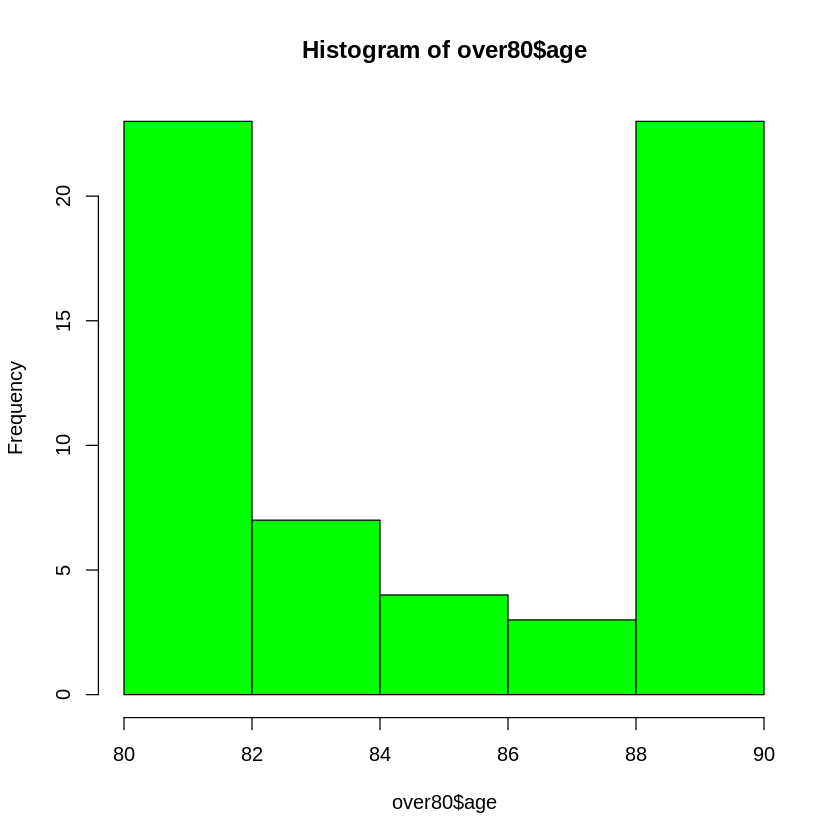

In [61]:
#making data frame for people >= 80 
over80 <- data.frame(adult_training[adult_training$age >= 80, ] )

#making histogram of people >= 80
hist(over80$age, col="green")